In [1]:
import numpy as np
import pandas as pd

In [2]:
kidney = pd.read_csv('chronic_kidney_disease_preprocessed.csv')

In [3]:
kidney = kidney.drop('id', axis=1)

In [4]:
kidney

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
392,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
393,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
394,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [5]:
# Separate the features and target variable
X = kidney.drop('class', axis=1)
y = kidney['class']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [10]:
# Train and test k-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [11]:
# Train and test Support Vector Machine
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [12]:
# Train and test Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate and print metrics
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")

# Evaluate k-Nearest Neighbors
evaluate_model("k-Nearest Neighbors", y_test, y_pred_knn)

# Evaluate Support Vector Machine
evaluate_model("Support Vector Machine", y_test, y_pred_svm)

# Evaluate Naive Bayes
evaluate_model("Naive Bayes", y_test, y_pred_nb)


Metrics for k-Nearest Neighbors:
Accuracy: 0.66
Precision: 0.50
Recall: 0.70
F1 Score: 0.58
Confusion Matrix:
[[34 19]
 [ 8 19]]


Metrics for Support Vector Machine:
Accuracy: 0.97
Precision: 0.93
Recall: 1.00
F1 Score: 0.96
Confusion Matrix:
[[51  2]
 [ 0 27]]


Metrics for Naive Bayes:
Accuracy: 0.99
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
Confusion Matrix:
[[52  1]
 [ 0 27]]




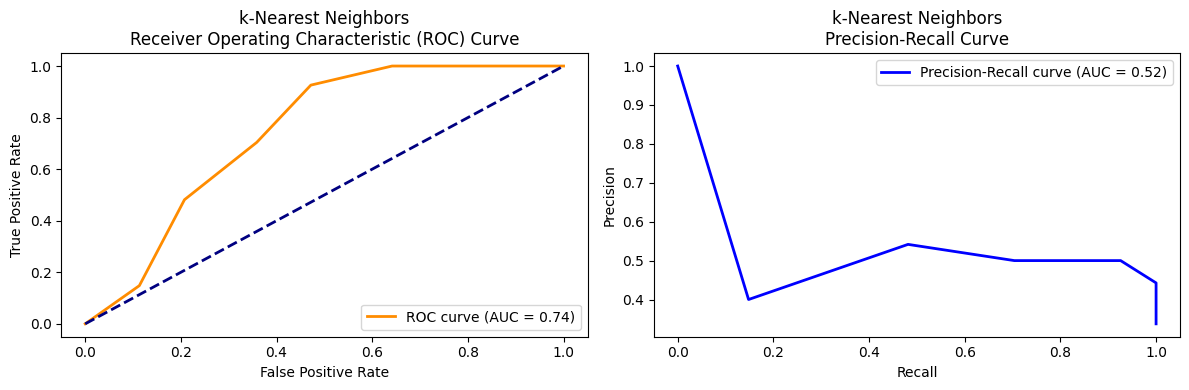

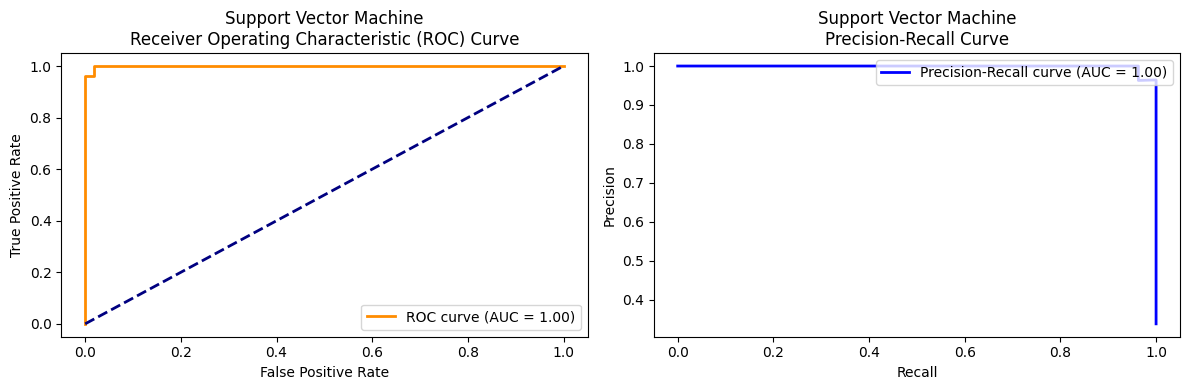

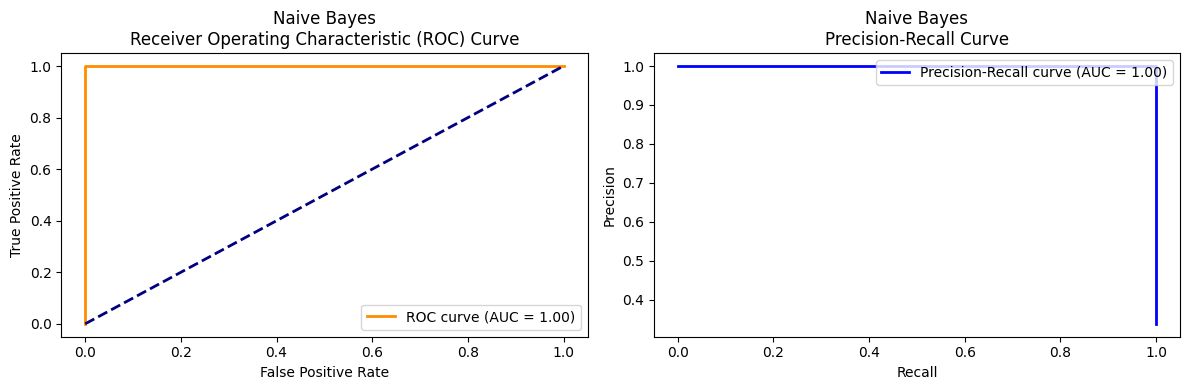

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Function to plot ROC and Precision-Recall curves
def plot_curves(y_true, y_probs, title):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    precision, recall, _ = precision_recall_curve(y_true, y_probs)

    # Plot ROC curve
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title}\nReceiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Plot Precision-Recall curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = {:.2f})'.format(auc(recall, precision)))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{title}\nPrecision-Recall Curve')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Visualize k-Nearest Neighbors
plot_curves(y_test, knn_model.predict_proba(X_test)[:, 1], 'k-Nearest Neighbors')

# Visualize Support Vector Machine
plot_curves(y_test, svm_model.decision_function(X_test), 'Support Vector Machine')

# Visualize Naive Bayes
plot_curves(y_test, nb_model.predict_proba(X_test)[:, 1], 'Naive Bayes')

